In [2]:
import sys; sys.path.append("..")
from dataset import AppleQualityDataset, Library
import pyAgrum
import numpy as np
import matplotlib.pyplot as plt

data = AppleQualityDataset(data_path="../data/apple_quality.csv", seed=42)

In [3]:
display(data.train_df.head())
display(data.test_df.head())

,size,weight,sweetness,crunchiness,juiciness,ripeness,acidity,quality
3012,0,1,1,0,0,2,1,0
1436,1,0,0,1,2,2,0,0
96,1,0,0,0,2,2,0,0
43,2,2,1,1,0,0,1,0
1814,0,2,0,1,0,2,2,0


,size,weight,sweetness,crunchiness,juiciness,ripeness,acidity,quality
555,2,0,0,1,1,2,1,1
3491,2,2,1,1,1,0,2,0
527,2,1,2,1,0,0,2,0
3925,0,1,2,0,0,2,1,1
2989,0,1,0,0,0,2,0,0


# Manually defined
---

Accuracy: 0.701


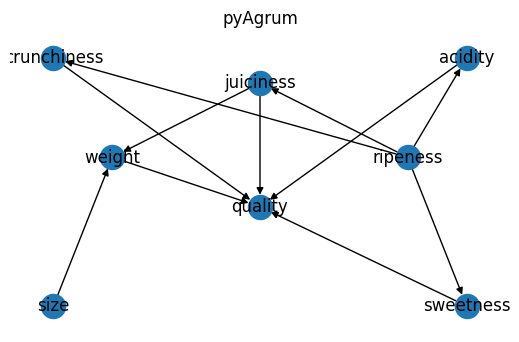

In [4]:
edges = [
    ("ripeness", "crunchiness"),
    ("ripeness", "sweetness"),
    ("ripeness", "juiciness"),
    ("ripeness", "acidity"),
    ("size", "weight"),
    ("juiciness", "weight"),
    ("juiciness", "quality"),
    ("crunchiness", "quality"),
    ("acidity", "quality"),
    ("sweetness", "quality"),
    ("weight", "quality"),
]

model = pyAgrum.BayesNet()
for col in data.train_df.columns: model.add(col, len(np.unique(data.train_df[col])))
for edge in edges: model.addArc(*edge)
learner = pyAgrum.BNLearner(data.train_df)
learner.useSmoothingPrior().fitParameters(model)

print(f"Accuracy: {data.evaluate(model, Library.PYAGRUM)}")

plt.figure(figsize=(5, 3))
data.plot(model, Library.PYAGRUM)
plt.show()

# Constraint-based
---

Accuracy: 0.779


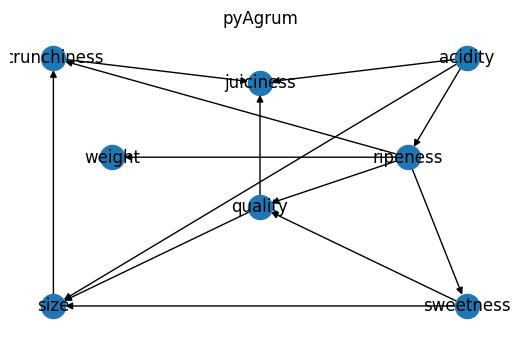

In [5]:
learner = pyAgrum.BNLearner(data.train_df)
learner.useMIIC()
model = learner.learnBN()

print(f"Accuracy: {data.evaluate(model, Library.PYAGRUM)}")

plt.figure(figsize=(5, 3))
data.plot(model, Library.PYAGRUM)
plt.show()

MDL correction accuracy: 0.779
NML correction accuracy: 0.751
No correction accuracy: 0.773


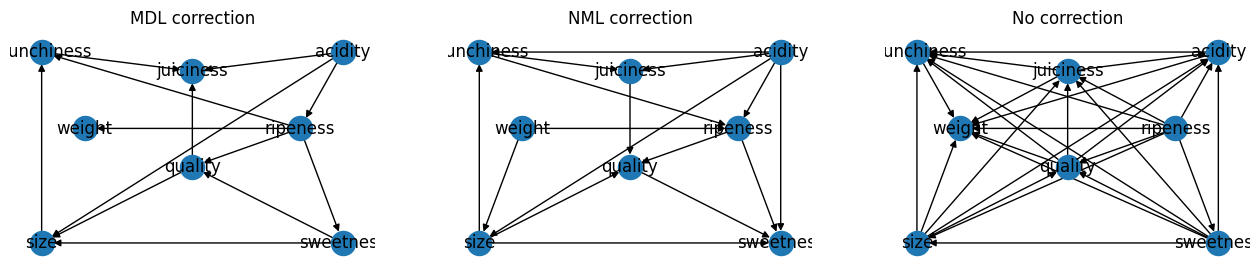

In [6]:
learner = pyAgrum.BNLearner(data.train_df)
learner.useMIIC().useMDLCorrection()
model_mdl = learner.learnBN()
print(f"MDL correction accuracy: {data.evaluate(model_mdl, Library.PYAGRUM)}")


learner = pyAgrum.BNLearner(data.train_df)
learner.useMIIC().useNMLCorrection()
model_nml = learner.learnBN()
print(f"NML correction accuracy: {data.evaluate(model_nml, Library.PYAGRUM)}")


learner = pyAgrum.BNLearner(data.train_df)
learner.useMIIC().useNoCorrection()
model_nocorr = learner.learnBN()
print(f"No correction accuracy: {data.evaluate(model_nocorr, Library.PYAGRUM)}")


plt.figure(figsize=(16, 3))

plt.subplot(1, 3, 1)
data.plot(model_mdl, Library.PYAGRUM)
plt.title("MDL correction")

plt.subplot(1, 3, 2)
data.plot(model_nml, Library.PYAGRUM)
plt.title("NML correction")

plt.subplot(1, 3, 3)
data.plot(model_nocorr, Library.PYAGRUM)
plt.title("No correction")

plt.show()

# Score-based
---

## Tabu search

Accuracy: 0.806


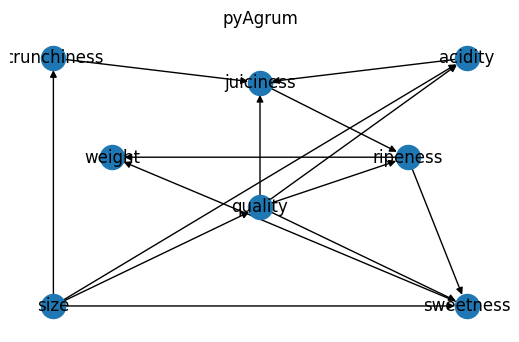

In [7]:
learner = pyAgrum.BNLearner(data.train_df)
learner.useLocalSearchWithTabuList()
model = learner.learnBN()

print(f"Accuracy: {data.evaluate(model, Library.PYAGRUM)}")

plt.figure(figsize=(5, 3))
data.plot(model, Library.PYAGRUM)
plt.show()

## Hill-climbing

Accuracy: 0.813


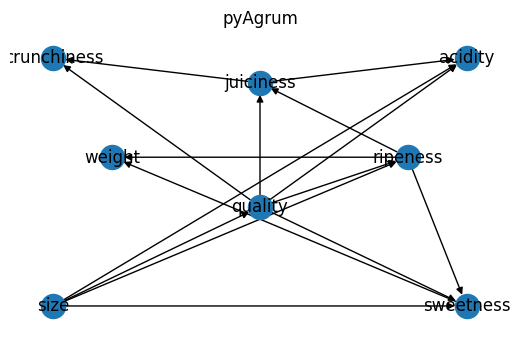

In [8]:
learner = pyAgrum.BNLearner(data.train_df)
learner.useGreedyHillClimbing()
model = learner.learnBN()

print(f"Accuracy: {data.evaluate(model, Library.PYAGRUM)}")

plt.figure(figsize=(5, 3))
data.plot(model, Library.PYAGRUM)
plt.show()

## K2

Accuracy: 0.769


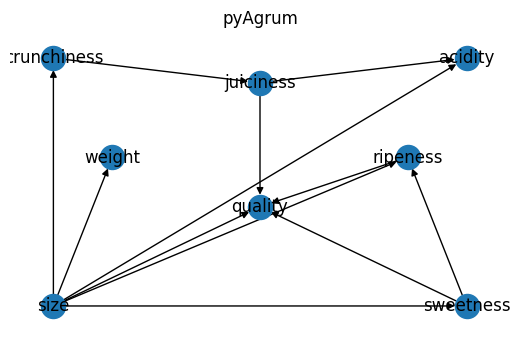

In [9]:
learner = pyAgrum.BNLearner(data.train_df)
learner.useK2([0,1,2,3,4,5,6,7])
model = learner.learnBN()

print(f"Accuracy: {data.evaluate(model, Library.PYAGRUM)}")

plt.figure(figsize=(5, 3))
data.plot(model, Library.PYAGRUM)
plt.show()